In [2]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'y')

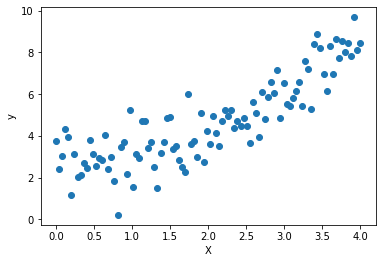

In [9]:
np.random.seed(0)
m = 100
X = np.linspace(0, 4, m).reshape((m, 1))
y = 2 + X**1.3 + np.random.randn(m, 1)
y = y.ravel()

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

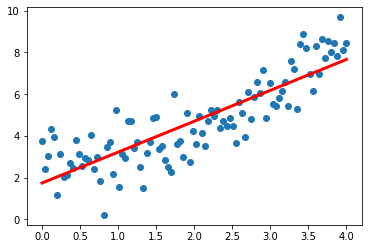

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

In [13]:
def custom_metric(y, y_pred):
    return np.sum((y_pred < y + y*0.2) & (y_pred > y - y*0.2))/y.size
custom_metric(y, y_pred)

0.63

In [14]:
from sklearn.metrics import make_scorer

In [17]:
custom_score = make_scorer(custom_metric, greater_is_better=True)

In [20]:
from sklearn.model_selection import cross_val_score, GridSearchCV
cross_val_score(LinearRegression(), X, y, cv=3, scoring=custom_score)


array([0.08823529, 0.42424242, 0.3030303 ])

In [22]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', degree=3)
params = {'gamma': np.arange(0.1, 1, 0.05)}

grid = GridSearchCV(model, param_grid=params, cv=3, scoring=custom_score)
grid.fit(X, y)


GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'gamma': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring=make_scorer(custom_metric))

In [24]:
best_model = grid.best_estimator_

In [26]:
y_pred = best_model.predict(X)

custom_metric(y, y_pred)

0.64

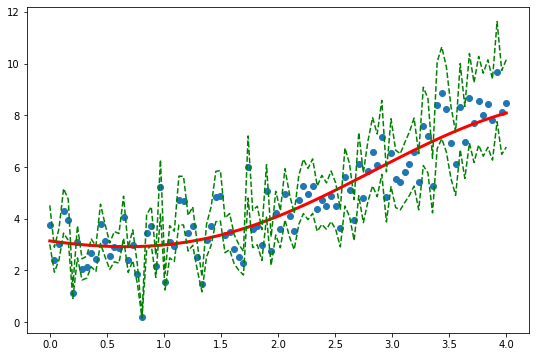

In [28]:
plt.figure(figsize=(9,6))
plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)
plt.plot(X, y + y*0.2, c='g', ls='--')
plt.plot(X, y - y*0.2, c='g', ls='--')